<img src="https://media.licdn.com/dms/image/D4E3DAQH0OTZuVYFxvg/image-scale_191_1128/0/1713952468638/encryptixofficial_cover?e=2147483647&v=beta&t=h0Xcu7-ewYU_tvJxzLtW51HunJTAewsL_3-LVVp1-T4" width="100%">

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset

In [7]:
dataset = pd.read_csv('/content/drive/MyDrive/Gt /creditcard.csv')

In [8]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [ ]:
print(dataset.info())
print("Any missing values:", dataset.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Data Preparation
X = dataset.iloc[:, 1:30].values
y = dataset.iloc[:, 30].values
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (284807, 29)
Output shape: (284807,)


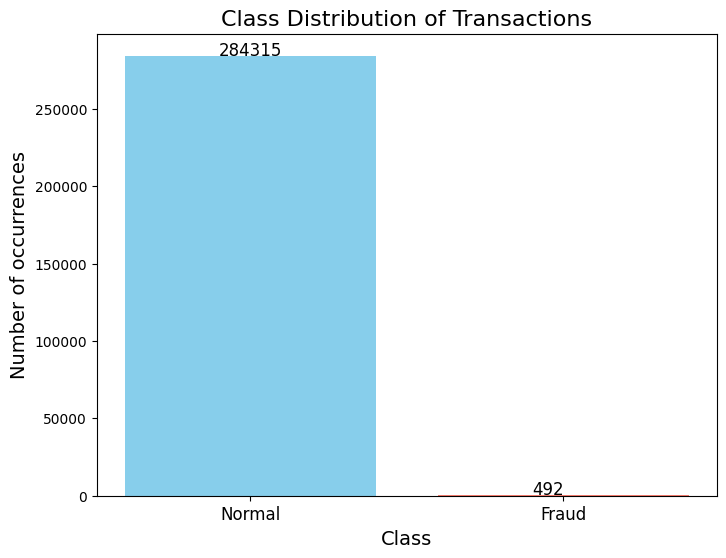

In [ ]:
# Visualize class distribution
set_class = pd.value_counts(dataset['Class'], sort=True)
plt.figure(figsize=(8, 6))
colors = ['skyblue', 'salmon']
bars = plt.bar(set_class.index, set_class.values, color=colors)
plt.title("Class Distribution of Transactions", fontsize=16)
plt.xticks(range(2), ["Normal", "Fraud"], fontsize=12)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Number of occurrences", fontsize=14)

# Annotate bars with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 500, int(yval), fontsize=12)

plt.show()

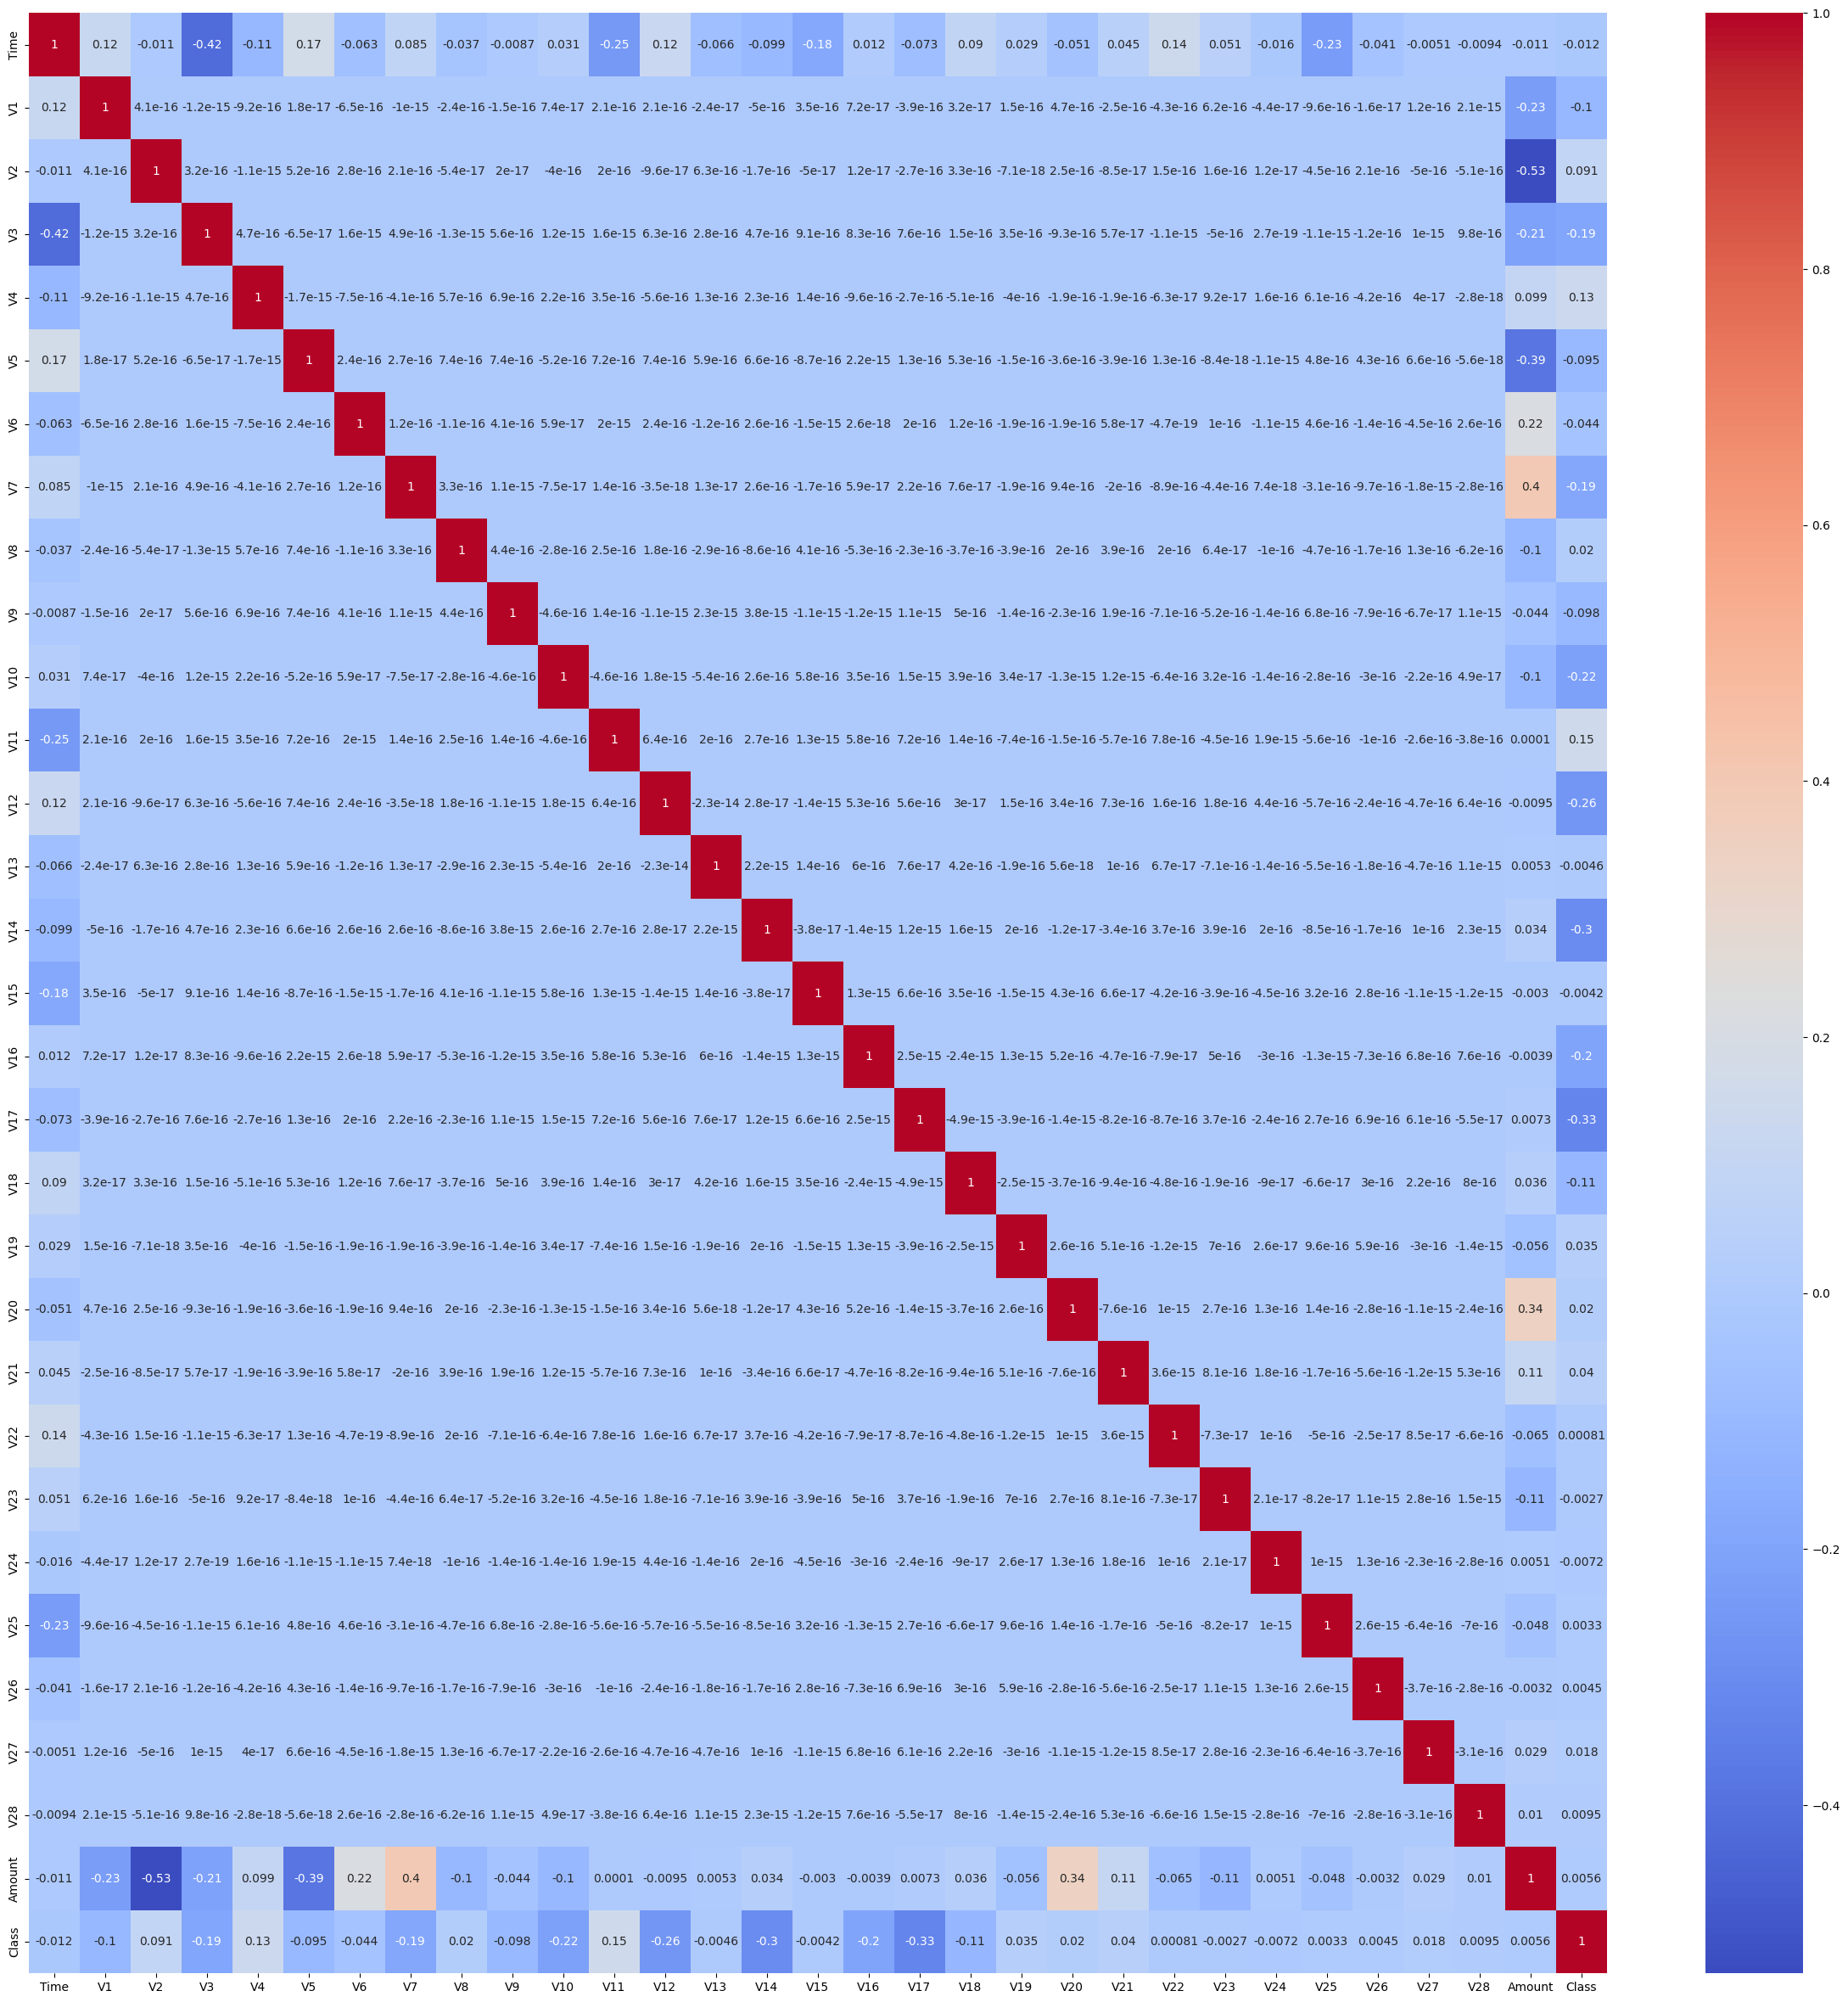

In [ ]:
# Correlation heatmap
plt.figure(figsize=(30, 30))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")  # Changed color map to 'coolwarm'
plt.show()

In [ ]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (213605, 29)
Test set shape: (71202, 29)


In [ ]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("Standardized training set sample:", x_train[0])

Standardized training set sample: [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Confusion Matrix:
 [[71076     6]
 [   28    92]]
Random Forest Accuracy: 0.999522485323446


In [ ]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(x_train, y_train)
y_pred_lr = lr_classifier.predict(x_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Confusion Matrix:
 [[71071    11]
 [   39    81]]
Logistic Regression Accuracy: 0.9992977725344794


In [ ]:
# Function to calculate evaluation metrics
def evaluate_model(cm):
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum() * 100
    error_rate = (cm[0, 1] + cm[1, 0]) / cm.sum() * 100
    specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1]) * 100
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0]) * 100
    return accuracy, error_rate, specificity, sensitivity

In [ ]:
# Evaluate models
metrics_rf = evaluate_model(cm_rf)
metrics_lr = evaluate_model(cm_lr)
print("Random Forest - Accuracy: {:.2f}%, Error Rate: {:.2f}%, Specificity: {:.2f}%, Sensitivity: {:.2f}%".format(*metrics_rf))
print("Logistic Regression - Accuracy: {:.2f}%, Error Rate: {:.2f}%, Specificity: {:.2f}%, Sensitivity: {:.2f}%".format(*metrics_lr))

Random Forest - Accuracy: 99.95%, Error Rate: 0.05%, Specificity: 93.88%, Sensitivity: 99.96%
Logistic Regression - Accuracy: 99.93%, Error Rate: 0.07%, Specificity: 88.04%, Sensitivity: 99.95%
